# **Machine Learning Approache**

Once the feature vectors have been extracted from the CSV, we can proceed with the machine learning approach. In this notebook, we will follow the standard machine learning process, including:

- Data Preprocessing: Cleaning and preparing the data for analysis.
- Feature Selection: Choosing the most relevant features for the model.
- Model Selection: Selecting an appropriate machine learning algorithm.
- Model Training: Training the chosen model on the training data.
- Model Evaluation: Assessing the performance of the model using evaluation metrics.
- Hyperparameter Tuning: Optimizing the model parameters for better performance.
- Model Deployment: Deploying the trained model for making predictions on new data.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder 
from imblearn.over_sampling import SMOTE ,BorderlineSMOTE, SVMSMOTE, SMOTENC,ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## Load Data

In [ ]:
dataset = pd.read_csv('classic_dataset.csv')
dataset['LABEL'] = dataset['LABEL'].map({'REAL': 1, 'FAKE': 0})
dataset

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,origin_sample,LABEL
0,0.406386,2.330448e-06,1726.655699,1313.557843,2691.572473,0.166597,-1100.7067,24.243960,-4.094224,-11.856074,...,-0.645584,-1.132566,-2.796956,-3.261251,-0.838425,0.040199,-0.060215,-1.380227,biden-to-linus,0
1,0.488610,1.630488e-06,1494.088560,1153.547713,2407.247340,0.133025,-1096.9489,24.468382,-14.611142,-24.319674,...,-4.825761,-5.560062,-2.493378,0.818925,1.947905,2.038474,0.929851,-0.998066,biden-to-linus,0
2,0.362645,3.494181e-06,1782.177518,1487.270741,3031.000665,0.133561,-1091.5085,32.404736,6.421550,0.285010,...,-2.619793,-1.499528,-1.358110,-2.547226,-2.780263,-4.007583,-1.956640,-2.554284,biden-to-linus,0
3,0.504109,1.449966e-06,1674.299640,1243.949639,2822.639628,0.154214,-1096.3325,22.426727,-19.766582,-29.948235,...,-6.615138,-6.136604,-0.366887,2.285073,2.371751,1.384992,0.033304,1.461536,biden-to-linus,0
4,0.350328,2.722042e-06,1806.168628,1466.968719,3179.770612,0.151310,-1098.4689,25.183228,2.385233,-2.528898,...,-4.927695,-4.255420,-3.070653,-1.945070,-1.668662,-3.040927,-2.284341,-1.515240,biden-to-linus,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,0.390607,7.107834e-07,1616.014539,1708.714104,3233.460771,0.111874,-1121.9220,10.930627,6.196433,2.819153,...,-0.427091,-0.014760,-0.732595,-1.226603,-0.793108,-0.386619,-0.622035,-0.927777,trump-original,1
10001,0.365970,1.233685e-06,2452.892084,1866.356939,4280.751330,0.226599,-1118.0184,13.119451,9.031300,4.715108,...,-1.801935,-0.429014,-0.371208,-0.587302,-0.158402,-0.792657,-0.824357,-0.328380,trump-original,1
10002,0.341479,1.393258e-06,1980.140163,1735.292494,3500.664894,0.148453,-1112.7692,16.963621,4.313049,2.521054,...,-0.666117,0.704803,-0.250046,-1.549501,-1.564756,-1.418983,-1.488376,-1.166654,trump-original,1
10003,0.390383,1.205535e-06,1872.171339,1523.071374,3237.699468,0.155502,-1108.4863,17.510643,-4.977057,-10.884156,...,-2.445194,-3.448995,-3.178353,-1.187702,0.125215,0.238736,0.170914,0.477557,trump-original,1


### **Important Info:**

**Problem Type:**

Classification (Binary)
Problem:<br>

**Goal:**

Build a machine learning model to predict if a segment is 'REAL' or 'FAKE'.<br>
These details (features we will use to predict), will let us determine the target variable which is:<br>
Target (1=REAL , 0=FAKE)

## Take a peek at the data 

In [23]:
print("The dataset has a shape of {}.".format(dataset.shape))
print("The data types of the credit records are:\n")
display(dataset.info())
print("Next, let's check if there are any missing values.")
display(dataset.isnull().sum())

The dataset has a shape of (10005, 28).
The data types of the credit records are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         10005 non-null  float64
 1   rms                 10005 non-null  float64
 2   spectral_centroid   10005 non-null  float64
 3   spectral_bandwidth  10005 non-null  float64
 4   rolloff             10005 non-null  float64
 5   zero_crossing_rate  10005 non-null  float64
 6   mfcc1               10005 non-null  float64
 7   mfcc2               10005 non-null  float64
 8   mfcc3               10005 non-null  float64
 9   mfcc4               10005 non-null  float64
 10  mfcc5               10005 non-null  float64
 11  mfcc6               10005 non-null  float64
 12  mfcc7               10005 non-null  float64
 13  mfcc8               10005 non-null  float64
 14  mfcc9              

None

Next, let's check if there are any missing values.


chroma_stft           0
rms                   0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
origin_sample         0
LABEL                 0
dtype: int64

Now that we have the targets, let's check our class distribution.
On classification problems it is important to know how balanced the class values are.
From the figure, below it is evident that there is a problem of imbalanced data even before dropping any duplicate values.
Will check again after data cleaning.


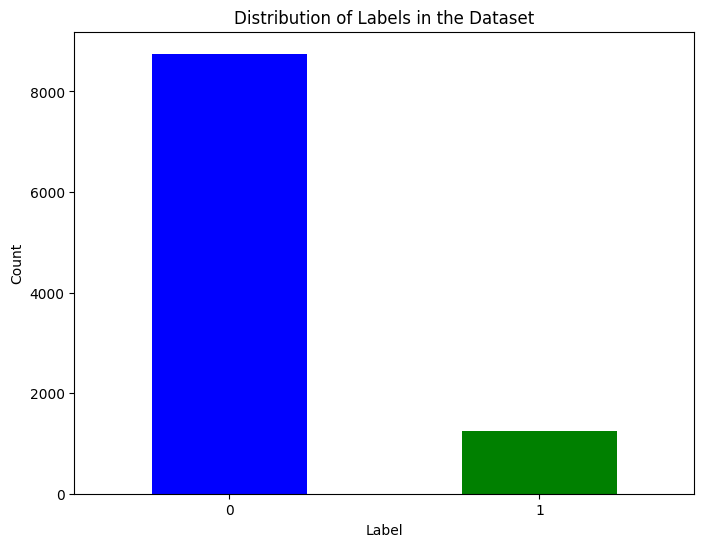

In [28]:
print("Now that we have the targets, let's check our class distribution.")
print("On classification problems it is important to know how balanced the class values are.")
print("From the figure, below it is evident that there is a problem of imbalanced data even before dropping any duplicate values.\nWill check again after data cleaning.")
distribution=dataset['LABEL'].value_counts()
distribution
plt.figure(figsize=(8, 6))
distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
